# Real-world Data Wrangling

In [89]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
  Using cached kaggle-1.6.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [90]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


In [91]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Defaulting to user installation because normal site-packages is not writeable
  Using cached kaggle-1.7.4.2-py3-none-any.whl (173 kB)
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.12
    Uninstalling kaggle-1.6.12:
      Successfully uninstalled kaggle-1.6.12
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note:** Restart the kernel to use updated package(s).

In [92]:
#Import all the required libraries to be used in this project.

import pandas as pd
import numpy as np
import os
import requests as rq
import seaborn as sn
import matplotlib.pyplot as plt

## 1. Gather data

### **1.1.** Problem Statement

Countries compete for Olympic medals differently - some send many athletes, while others focus on specific sports they're good at. When we look at how many medals each country wins compared to their number of athletes, we see that smaller nations like Jamaica and Hungary can be surprisingly successful by concentrating on their strengths rather than competing in everything. 

Therefore, I decided to analyze the relationship between athlete participation and medal outcomes to answer the research question: "Which countries are best at specific sports, and does this affect what kind of medals (gold, silver, or bronze) they win?"


# **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**

Type: CSV File, called athletes.csv.

Method: This file is downloaded programatically using get function in the requests module from the Paris 2024 Olympic Summer Games by PETRO user in Kaggle, using the following url: 
["https://www.kaggle.com/api/v1/datasets/download/piterfm/paris-2024-olympic-summer-games/athletes.csv"](https://www.kaggle.com/api/v1/datasets/download/piterfm/paris-2024-olympic-summer-games/athletes.csv).

This file includes personal information about all athletes. In this project, not all variables will be used to answer the research question defined in the problem statement.

Dataset variables:

* code: Athlete's code for the participation in olympics 2024. 
* name: Athlete's full name, capitalized surname + first name.
* name_short: Athlete's short name, capitalized surname + first letter of the first name.
* name_tv: Athlete's full name as shown on the tv, first name + capitalized surname.
* gender: Athlete's gender, male or female.
* country_code: Athlete's country abbreviation.
* country: Country name which the athlete represents.
* height: Athlete's height.
* weight: Athlete's weight.
* disciplines: A specific category within a group of sports.
* events: A specific competition where athletes compete for medals. Each discipline can contain multiple events.
* birth_date: Athlete's birth date.

This dataset includes more variables (such as function, birth_place, family, etc.), will be dropped where no effect for them on this research. 

In [93]:
#Get the data from CSV file in kaggle url.
response = rq.get("https://www.kaggle.com/api/v1/datasets/download/piterfm/paris-2024-olympic-summer-games/athletes.csv")

#Create a new folder called datasets to store both datasets in it.
os.makedirs("./datasets", exist_ok=True)

#Create a new CSV file called athletes.csv in the datasets folder and load the fetched content in it.
with open(os.path.join("./datasets", 'athletes.csv'), 'wb') as t:
                t.write(response.content)

#Read the CSV file and load it into the df_athletes dataframe.         
df_athletes = pd.read_csv('datasets/athletes.csv')

#### Dataset 2

Type: CSV File, called medallists.csv.

Method: This file is downloaded manually from the same source, which is Paris 2024 Olympic Summer Games by PETRO user in Kaggle, I used this data gathering method in order to meet the project's requirements in using two different data gathering methods. The file is downloaded from kaggle and then uploaded into the same folder "datasets" manually.

This file includes a brief information about all medalists. All athletes in the medalists dataset supposed to exist in the athletes dataset but not vice versa. In this project, not all variables will be used to answer the research question defined in the problem statement.

Dataset variables:

* medal_type: The awarded medal type (Gold, Silver, Bronze).
* medal_code: The code of the medal type (Gold: 1, Silver: 2, Bronze: 3).
* name: The medalist name, and it's format is same as the name in athletes dataset.
* gender: Medalist's gender, male or female.
* country_code: Medalist's country abbreviation.
* country: Country name which the athlete represents.
* team: Name of the medallist's team if exist.
* discipline: A specific category within a group of sports.
* events: A specific competition where athletes compete for medals. Each discipline can contain multiple events.
* code_athlete: Athlete's code for the participation in olympics 2024.
* code_team: Code of the medallist's team if exist.

This dataset includes more variables, will be dropped where no effect for them on this research.

In [94]:
#Read the CSV file and load it into the df_medalists dataframe.
df_medalists = pd.read_csv('./datasets/medallists.csv')

Before assessing and cleaning the data, let's decrease the number of variables by dropping the unnecessary columns, to simplify the analysis process and to be easier to inspect the dataframe visually.

In [95]:
#Returns info about the athletes dataframe including the number of non-null values.
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11113 non-null  int64  
 1   current             11113 non-null  bool   
 2   name                11113 non-null  object 
 3   name_short          11110 non-null  object 
 4   name_tv             11110 non-null  object 
 5   gender              11113 non-null  object 
 6   function            11113 non-null  object 
 7   country_code        11113 non-null  object 
 8   country             11113 non-null  object 
 9   country_long        11113 non-null  object 
 10  nationality         11110 non-null  object 
 11  nationality_long    11110 non-null  object 
 12  nationality_code    11110 non-null  object 
 13  height              11110 non-null  float64
 14  weight              11108 non-null  float64
 15  disciplines         11113 non-null  object 
 16  even

In [96]:
#Returns info about the medalists dataframe including the number of non-null values.
df_medalists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   medal_date        2315 non-null   object 
 1   medal_type        2315 non-null   object 
 2   medal_code        2314 non-null   float64
 3   name              2315 non-null   object 
 4   gender            2315 non-null   object 
 5   country_code      2315 non-null   object 
 6   country           2315 non-null   object 
 7   country_long      2315 non-null   object 
 8   nationality_code  2314 non-null   object 
 9   nationality       2314 non-null   object 
 10  nationality_long  2314 non-null   object 
 11  team              1555 non-null   object 
 12  team_gender       1555 non-null   object 
 13  discipline        2315 non-null   object 
 14  event             2315 non-null   object 
 15  event_type        2315 non-null   object 
 16  url_event         2294 non-null   object 


As shown in the info of the athlete's dataframe, a lot of null values in the variables starting from `birth_place` till `other_sports`, besides the unnecessity of these variables in this analysis.

Initially, will create a new dataframe called `sub_df_athletes` and include the first 18 columns starting from `code` till `birth_date`, then continue the assessing and cleaning process on the new dataframe.

In [97]:
#Create a new dataframe includes the first 18 columns of the athletes dataset.
sub_df_athletes = df_athletes.iloc[:, 0:18]

## 2. Assess data

### Quality Issue 1:

In [98]:
#Inspecting the dataframe visually.
#Print a specific random sample of 5 records in the athletes subset dataframe.
sub_df_athletes.sample(5, random_state=10)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
7811,1944930,True,HAND Jacqui,HAND J,Jacqui HAND,Female,Athlete,NZL,New Zealand,New Zealand,New Zealand,New Zealand,NZL,169.0,0.0,['Football'],['Women'],1999-02-19
344,1539342,True,TOADER Andrei Rares,TOADER AR,Andrei Rares TOADER,Male,Athlete,ROU,Romania,Romania,Romania,Romania,ROU,188.0,0.0,['Athletics'],"[""Men's Shot Put""]",1997-05-26
6386,1927381,True,LIN Wenjun,LIN W,LIN Wenjun,Female,Athlete,CHN,China,People's Republic of China,China,People's Republic of China,CHN,0.0,0.0,['Canoe Sprint'],"[""Women's Canoe Single 200m""]",1997-06-03
5499,1918373,True,SHI Zhiyong,SHI Z,SHI Zhiyong,Male,Athlete,CHN,China,People's Republic of China,China,People's Republic of China,CHN,0.0,0.0,['Weightlifting'],"[""Men's 73kg""]",1993-10-10
5108,1912557,True,STEWART Mark,STEWART M,Mark STEWART,Male,Athlete,GBR,Great Britain,Great Britain,Great Britain,Great Britain,GBR,0.0,0.0,['Cycling Track'],"[""Men's Madison""]",1995-08-25


<Axes: >

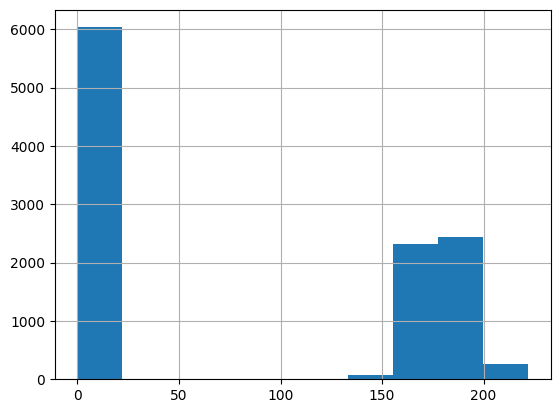

In [99]:
#Inspecting the dataframe visually.
#Plot a histogram to show the distribution of height values.
sub_df_athletes['height'].hist(bins=10, alpha=1)

<Axes: >

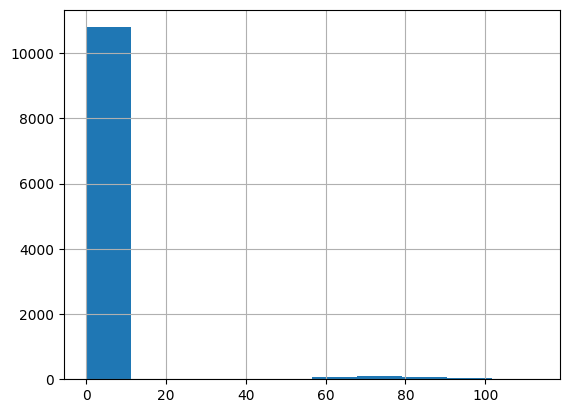

In [100]:
#Inspecting the dataframe visually.
#Plot a histogram to show the distribution of weight values.
sub_df_athletes['weight'].hist(bins=10, alpha=1)

In [101]:
#Inspecting the dataframe programmatically.
#Returns info about the athletes subset dataframe including the number of non-null values.
sub_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11113 non-null  int64  
 1   current           11113 non-null  bool   
 2   name              11113 non-null  object 
 3   name_short        11110 non-null  object 
 4   name_tv           11110 non-null  object 
 5   gender            11113 non-null  object 
 6   function          11113 non-null  object 
 7   country_code      11113 non-null  object 
 8   country           11113 non-null  object 
 9   country_long      11113 non-null  object 
 10  nationality       11110 non-null  object 
 11  nationality_long  11110 non-null  object 
 12  nationality_code  11110 non-null  object 
 13  height            11110 non-null  float64
 14  weight            11108 non-null  float64
 15  disciplines       11113 non-null  object 
 16  events            11113 non-null  object

In [102]:
#Inspecting the dataframe programmatically.
#Returns summary statistics of the athletes subset dataframe, including mean, count, etc.
sub_df_athletes.describe()

,code,height,weight
count,1.111300e+04,11110.000000,11108.000000
mean,1.887418e+06,81.798830,2.211919
std,3.588006e+05,89.508247,13.109608
min,1.532872e+06,0.000000,0.000000
25%,1.888184e+06,0.000000,0.000000
50%,1.918840e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


In [103]:
#Inspecting the dataframe programmatically.
#Print the number and percentage of zero values in the height column.
print(f"Number of Zeros in the height Column: {(sub_df_athletes['height'] == 0).sum()}")
print(f"Percentage of Zeros in the height Column: {(sub_df_athletes['height'] == 0).sum() / sub_df_athletes['height'].count()}")

Number of Zeros in the height Column: 6032
Percentage of Zeros in the height Column: 0.542934293429343


In [104]:
#Inspecting the dataframe programmatically.
#Print the number and percentage of zero values in the weight column.
print(f"Number of Zeros in the weight Column: {(sub_df_athletes['weight'] == 0).sum()}")
print(f"Percentage of Zeros in the weight Column: {(sub_df_athletes['weight'] == 0).sum() / sub_df_athletes['weight'].count()}")

Number of Zeros in the weight Column: 10792
Percentage of Zeros in the weight Column: 0.9715520345696795


**Issue and justification:** After inspecting the athletes dataset visually using the `.sample()` function and plotting histograms using `.hist()`, we can notice that most values in both `height` and `weight` are zeros (0), and when inspected that programatically using `.info()`, we can see there is three missing values (NULL) in the `height` column, and five missing values in the `weight` column. 
Using the `.describe()` function, it confirms that through having zero in the minimum value for both columns is zero. 

To confirm this issue, I calculated the count of zero values in each column using `.sum()`, and got 6032 zeros in the `height` column, which presents around %54 of the data, and 10792 zeros in the `weight` column, which presents around %97 of the data. 

This data quality issue may violate the completeness dimension, if we consider zeros as a missing values, and may also violate validity, since zero is not within an acceptable value range for height and weight. 

### Quality Issue 2:

In [105]:
#Inspecting the dataframe visually.
#Print a specific random sample of 5 records for the duplicated name in the athletes subset dataframe.
sub_df_athletes[sub_df_athletes['name'].duplicated(keep=False)].sample(5, random_state=10)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
4518,1905369,True,PEREZ Maria,PEREZ M,Maria PEREZ,Female,Athlete,ESP,Spain,Spain,Spain,Spain,ESP,159.0,0.0,['Athletics'],"[""Women's 20km Race Walk"", 'Marathon Race Walk...",1996-04-29
6310,1926914,True,YANG Liu,YANG L,YANG Liu,Female,Athlete,CHN,China,People's Republic of China,China,People's Republic of China,CHN,0.0,0.0,['Hockey'],['Women'],1998-09-01
1691,1564349,True,HAMZA Malak,HAMZA M,Malak HAMZA,Female,Athlete,EGY,Egypt,Egypt,Egypt,Egypt,EGY,0.0,0.0,['Trampoline Gymnastics'],['Women'],2001-11-05
4130,1901954,True,WATANABE Yuta,WATANABE Y,WATANABE Yuta,Male,Athlete,JPN,Japan,Japan,Japan,Japan,JPN,206.0,0.0,['Basketball'],['Men'],1994-10-13
894,1550089,True,PEREZ Maria,PEREZ M,Maria PEREZ,Female,Athlete,PUR,Puerto Rico,Puerto Rico,United States,United States of America,USA,0.0,0.0,['Judo'],['Women -70 kg'],1989-04-01


In [106]:
#Inspecting the dataframe visually.
#Print all records include a duplicated athlete's name in the athletes subset dataframe,
#and sort them by name.
sub_df_athletes[sub_df_athletes['name'].duplicated(keep=False)].sort_values(by='name')

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
1553,1562788,True,ELSAYED Mohamed,ELSAYED M,Mohamed ELSAYED,Male,Athlete,EGY,Egypt,Egypt,Egypt,Egypt,EGY,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1998-03-16
7070,1936462,True,ELSAYED Mohamed,ELSAYED M,Mohamed ELSAYED,Male,Athlete,EGY,Egypt,Egypt,Egypt,Egypt,EGY,0.0,0.0,['Fencing'],"[""Men's Épée Individual"", ""Men's Épée Team""]",2003-03-03
56,1535351,True,FERNANDEZ Federico,FERNANDEZ F,Federico FERNANDEZ,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0.0,0.0,['Equestrian'],"['Jumping Individual', 'Jumping Team']",1968-03-28
398,1540120,True,FERNANDEZ Federico,FERNANDEZ F,Federico FERNANDEZ,Male,Athlete,ARG,Argentina,Argentina,Argentina,Argentina,ARG,187.0,0.0,['Handball'],['Men'],1989-10-17
1691,1564349,True,HAMZA Malak,HAMZA M,Malak HAMZA,Female,Athlete,EGY,Egypt,Egypt,Egypt,Egypt,EGY,0.0,0.0,['Trampoline Gymnastics'],['Women'],2001-11-05
7088,1936715,True,HAMZA Malak,HAMZA M,Malak HAMZA,Female,Athlete,EGY,Egypt,Egypt,Egypt,Egypt,EGY,0.0,0.0,['Fencing'],"[""Women's Foil Individual"", ""Women's Foil Team""]",2006-02-16
7930,1945581,True,HENDERSON Rebecca,HENDERSON R,Rebecca HENDERSON,Female,Athlete,AUS,Australia,Australia,Australia,Australia,AUS,0.0,0.0,['Cycling Mountain Bike'],"[""Women's Cross-country""]",1991-09-27
7293,1939846,True,HENDERSON Rebecca,HENDERSON R,Rebecca HENDERSON,Female,Athlete,AUS,Australia,Australia,Australia,Australia,AUS,162.0,0.0,['Athletics'],"[""Women's 20km Race Walk"", 'Marathon Race Walk...",2001-07-04
10790,1980872,True,NOVAK Domen,NOVAK D,Domen NOVAK,Male,Athlete,SLO,Slovenia,Slovenia,Slovenia,Slovenia,SLO,0.0,0.0,['Cycling Road'],"[""Men's Road Race""]",1995-07-12
10791,1980873,True,NOVAK Domen,NOVAK D,Domen NOVAK,Male,Athlete,SLO,Slovenia,Slovenia,Slovenia,Slovenia,SLO,182.0,0.0,['Handball'],['Men'],1998-04-26


In [107]:
#Inspecting the dataframe programmatically.
#Check if there is any duplicated values in the name column.
sub_df_athletes['name'].duplicated().any()

True

In [108]:
#Inspecting the dataframe programmatically.
#Get the count of the duplicated values in the name column, excluding the first occurrence. 
sub_df_athletes['name'].duplicated().sum()

10

In [109]:
#Inspecting the dataframe programmatically.
#Returns summary statistics of the name column in the athletes subset dataframe, 
#including the count of all values and the count of unique values in the name column, etc.
sub_df_athletes['name'].describe()

count              11113
unique             11103
top       PORTELA Teresa
freq                   2
Name: name, dtype: object

**Issue and justification:** Through inspecting the athletes dataset visually using the `.sample()` function on the `.duplicated()` function for the `name` column, we can notice that the name *PEREZ Maria* is duplicated twice in the sample with different values in the `code`, `country`, etc. To get all the duplicated values in the `name` column, I used the `.duplicated()` function with `.sort_values(by='name')` to print all records including the duplicated names sorted. 

Then I inspected that programatically using `.duplicated().any()` for the `name` column, which returned **True**, and to get the count of duplicate values in the same column, I used `.duplicated().sum()`, which returned **10** values. At the end, and to confirm the number of duplication in the `name` column, I used `.describe()` on the specific variable, which returned the count of all values **11113** and the count of unique values **11103**, which confirm the existence of **10** duplicated values.     

This data quality issue may violate the uniqueness dimension.

### Quality Issue 3:

In [110]:
#Inspecting the dataframe visually.
#Print a specific random sample of 5 records for the null values in the athletes subset dataframe.
sub_df_athletes[sub_df_athletes.isna().any(axis=1)].sample(5, random_state=10)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
11109,9460001,True,LIUZZI Emanuela,LIUZZI E,Emanuela LIUZZI,Female,Athlete,ITA,Italy,Italy,NaN,NaN,NaN,0.0,0.0,['Wrestling'],"[""Women's Freestyle 50kg""]",2000-04-27
11112,1924402,False,CARVELL Charlie,NaN,NaN,Male,Athlete,GBR,Great Britain,Great Britain,Great Britain,Great Britain,GBR,NaN,NaN,[Athletics],[Men's 4 x 400m Relay],2004-06-30
6122,1925762,True,GRYCZ Marek,GRYCZ M,Marek GRYCZ,Male,Athlete,CZE,Czechia,Czechia,NaN,NaN,NaN,0.0,NaN,['Modern Pentathlon'],"[""Men's Individual""]",1997-09-15
11110,1972077,False,BOERS Isayah,NaN,NaN,Male,Athlete,NED,Netherlands,Netherlands,Netherlands,Netherlands,NED,NaN,NaN,[Athletics],[4 x 400m Relay Mixed],1999-06-19
11111,1899865,False,STAUT Kevin,NaN,NaN,Male,Athlete,FRA,France,France,France,France,FRA,NaN,NaN,[Equestrian],[Jumping Team],1980-11-15


In [111]:
#Inspecting the dataframe visually.
#Print all records include null values in the athletes subset dataframe.
sub_df_athletes[sub_df_athletes.isna().any(axis=1)]

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
6122,1925762,True,GRYCZ Marek,GRYCZ M,Marek GRYCZ,Male,Athlete,CZE,Czechia,Czechia,NaN,NaN,NaN,0.0,NaN,['Modern Pentathlon'],"[""Men's Individual""]",1997-09-15
10201,1971965,True,SANDERS Pien,SANDERS P,Pien SANDERS,Female,Athlete,NED,Netherlands,Netherlands,NaN,NaN,NaN,0.0,NaN,['Hockey'],['Women'],1998-06-11
11109,9460001,True,LIUZZI Emanuela,LIUZZI E,Emanuela LIUZZI,Female,Athlete,ITA,Italy,Italy,NaN,NaN,NaN,0.0,0.0,['Wrestling'],"[""Women's Freestyle 50kg""]",2000-04-27
11110,1972077,False,BOERS Isayah,NaN,NaN,Male,Athlete,NED,Netherlands,Netherlands,Netherlands,Netherlands,NED,NaN,NaN,[Athletics],[4 x 400m Relay Mixed],1999-06-19
11111,1899865,False,STAUT Kevin,NaN,NaN,Male,Athlete,FRA,France,France,France,France,FRA,NaN,NaN,[Equestrian],[Jumping Team],1980-11-15
11112,1924402,False,CARVELL Charlie,NaN,NaN,Male,Athlete,GBR,Great Britain,Great Britain,Great Britain,Great Britain,GBR,NaN,NaN,[Athletics],[Men's 4 x 400m Relay],2004-06-30


In [112]:
#Inspecting the dataframe programmatically.
#Returns columns with the existance of null values in each one.
sub_df_athletes.isna().any()

code                False
current             False
name                False
name_short           True
name_tv              True
gender              False
function            False
country_code        False
country             False
country_long        False
nationality          True
nationality_long     True
nationality_code     True
height               True
weight               True
disciplines         False
events              False
birth_date          False
dtype: bool

In [113]:
#Inspecting the dataframe programmatically.
#Returns the count of null in each column.
sub_df_athletes.isna().sum()

code                0
current             0
name                0
name_short          3
name_tv             3
gender              0
function            0
country_code        0
country             0
country_long        0
nationality         3
nationality_long    3
nationality_code    3
height              3
weight              5
disciplines         0
events              0
birth_date          0
dtype: int64

**Issue and justification:** Through inspecting the athletes dataset visually using the `.sample()` function on the `.isna()` function, we can notice that there is **NAN** values in `name_short`, `name_tv`, `nationality`, `nationality_long`, `nationality_code`, `height`, and `weight` columns. To get all *NULL* values in all columns in the dataframe, I used `.isna().any(axis=1)`.  

Then I inspected that programatically using `.isna().any()` for the dataframe, which returned **True** for each column includes *NULL* values, then I used `.isna().sum()`, which returned **3** *NULL* values in each of the mentioned columns except the `weight` column, which returned **5** *NULL* values.   

This data quality issue may violate the completeness dimension.

### Tidiness Issue 1:

In [114]:
#Inspecting the dataframe visually.
#Print the first 5 records in the athletes subset dataframe.
sub_df_athletes.head()

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22
2,1532874,True,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21
3,1532944,True,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22
4,1532945,True,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27


In [115]:
#Inspecting the dataframe visually.
#Print a specific random sample of 5 records in the athletes subset dataframe.
sub_df_athletes.sample(5, random_state=20)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
5185,1913555,True,PATURAU Julie,PATURAU J,Julie PATURAU,Female,Athlete,MRI,Mauritius,Mauritius,Mauritius,Mauritius,MRI,0.0,0.0,['Sailing'],"[""Women's Kite""]",2000-12-19
3909,1899576,True,PENI Istvan,PENI I,Istvan PENI,Male,Athlete,HUN,Hungary,Hungary,Hungary,Hungary,HUN,0.0,0.0,['Shooting'],"['10m Air Rifle Men', '50m Rifle 3 Positions M...",1997-02-14
789,1546675,True,POLETTI Giuliana,POLETTI G,Giuliana POLETTI,Female,Athlete,PAR,Paraguay,Paraguay,Paraguay,Paraguay,PAR,180.0,0.0,['Beach Volleyball'],['Women'],2000-09-30
3331,1894966,True,KAEI Lorine Chebet,KAEI LC,LORINE,Female,Athlete,KEN,Kenya,Kenya,Kenya,Kenya,KEN,179.0,0.0,['Volleyball'],['Women'],1999-10-08
9150,1958386,True,ISHIY Vitor,ISHIY V,Vitor ISHIY,Male,Athlete,BRA,Brazil,Brazil,Brazil,Brazil,BRA,0.0,0.0,['Table Tennis'],"[""Men's Singles"", ""Men's Team"", 'Mixed Doubles']",1995-09-22


In [116]:
#Inspecting the dataframe programmatically.
#Check if multiple values are stored in the disciplines column whith a "," separator.
sub_df_athletes['disciplines'].str.contains(',').any()

True

In [117]:
#Inspecting the dataframe programmatically.
#Check if multiple values are stored in the events column whith a "," separator.
sub_df_athletes['events'].str.contains(',').any()

True

In [118]:
#Inspecting the dataframe programmatically.
#Returns the count of the values stored in the disciplines column in list format.
sub_df_athletes['disciplines'].apply(lambda x: isinstance(x, str) and x.startswith('[') and x.endswith(']')).sum()

11113

In [119]:
#Inspecting the dataframe programmatically.
#Returns the count of the values stored in the events column in list format.
sub_df_athletes['events'].apply(lambda x: isinstance(x, str) and x.startswith('[') and x.endswith(']')).sum()

11113

In [120]:
#Inspecting the dataframe programmatically.
#Check if multiple values are stored in the discipline column whith a "," separator 
#in the medalists dataframe.
df_medalists['discipline'].str.contains(',').any()

False

In [121]:
#Inspecting the dataframe programmatically.
#Returns the count of the values stored in the discipline column in list format
#in the medalists dataframe.
df_medalists['discipline'].apply(lambda x: isinstance(x, str) and x.startswith('[') and x.endswith(']')).sum()

0

**Issue and justification:** After inspecting the athletes sub-dataset visually using the `.head()` and the `.sample()` functions, we can notice that all values in the `disciplines` and `events` columns are stored as a sting in a list of values format in each cell. Also, some values in these columns include multiple values with "," separator.

Then I inspected that programatically using `.str.contains(',').any()` for both `disciplines` and `events` columns in the dataframe, to check whether both columns include multiple values in the same field and separated with a "," separator, which already returned **True** for each column. Then I used the `.apply()` function including `lambda x:` to check if the value in the column is a string using `isinstance(x, str)` and if the string starts with a " \[ \" using `x.startswith('[')` and if the same string ends with a " \[ \" using `x.endswith(']')`, then I used the `.sum()` function to get the count of occurrences to ensure that all values in these columns are in the same format, and it returns **11113**.

When I checked the same previous conditions on the `discipline` column in the medalists dataframe, we notice that one discipline is stored in each row without using the "," separator, and not saved as a string with a list format. 

This data tidiness issue may violate the **each variable forms a column** rule.

### Tidiness Issue 2: 

In [122]:
#Inspecting the dataframe visually.
#Print the first 5 records in the athletes subset dataframe.
sub_df_athletes.head()

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,nationality_long,nationality_code,height,weight,disciplines,events,birth_date
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22
2,1532874,True,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21
3,1532944,True,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22
4,1532945,True,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,Armenia,ARM,0.0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27


In [123]:
#Inspecting the dataframe visually.
#Print the first 5 records in the medalists dataframe.
df_medalists.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True


In [124]:
#Inspecting the dataframe programmatically.
#Returns the count of the unique values in each column in athletes sub-dataframe.
sub_df_athletes.nunique()

code                11113
current                 2
name                11103
name_short          10756
name_tv             11099
gender                  2
function                2
country_code          206
country               206
country_long          206
nationality           197
nationality_long      197
nationality_code      197
height                 74
weight                 55
disciplines            52
events                643
birth_date           5518
dtype: int64

In [125]:
#Inspecting the dataframe programmatically.
#Returns the count of the unique values in each column in medalists dataframe.
df_medalists.nunique()

medal_date            16
medal_type             3
medal_code             3
name                2053
gender                 2
country_code          92
country               92
country_long          92
nationality_code      92
nationality           92
nationality_long      92
team                 101
team_gender            4
discipline            45
event                288
event_type             6
url_event            489
birth_date          1748
code_athlete        2054
code_team            284
is_medallist           2
dtype: int64

**Issue and justification:** After inspecting the athletes sub-dataset and the medalists dataset visually using the `.head()` function, we can notice that there is a multiple columns related to the country and nationality of the athlete, and values of these columns are duplicated in many rows, these columns are:
* country_code.
* country.
* country_long.
* nationality_code.
* nationality.
* nationality_long.

Then I inspected that programatically using `.nunique()` for both dataframes to get the number of unique values in each column mentioned previously, so we have **206** unique values in the `country_code`, `country` and `country_long` columns and **197** unique values in the `nationality_code`, `nationality` and `nationality_long` columns in the athletes sub-dataframe. On the other hand, we have **92** unique values for all these columns in the medalists dataframe.

This data tidiness issue may violate the **each type of observational unit forms a table** rule.

## 3. Clean data

First of all, let's drop all unnecessary variables in our analysis from both datasets to reduce the dimensionality in order to simplify analysis and improve the model performance.

I will keep the following variables (columns):

**Athletes Dataset:**
* code.
* name.
* name_short.
* name_tv.
* country_code.
* country.
* country_long.
* nationality_code.
* nationality.
* nationality_long.
* height.
* weight.
* disciplines.

**Medalists Dataset:**
* medal_type.
* medal_code.
* name.
* country_code.
* discipline.
* code_athlete.

In [126]:
#Make a copy of the athletes sub-dataset with the necessary columns 
#to ensure the raw dataframe is not impacted.
cleaned_df_athletes = sub_df_athletes[['code', 'name', 'country_code', 'country', 'country_long', 
                                      'nationality_code', 'nationality', 'nationality_long', 
                                      'height', 'weight', 'disciplines']].copy()

In [127]:
#Print the first 5 records in the athletes cleaned dataframe.
cleaned_df_athletes.head()

,code,name,country_code,country,country_long,nationality_code,nationality,nationality_long,height,weight,disciplines
0,1532872,ALEKSANYAN Artur,ARM,Armenia,Armenia,ARM,Armenia,Armenia,0.0,0.0,['Wrestling']
1,1532873,AMOYAN Malkhas,ARM,Armenia,Armenia,ARM,Armenia,Armenia,0.0,0.0,['Wrestling']
2,1532874,GALSTYAN Slavik,ARM,Armenia,Armenia,ARM,Armenia,Armenia,0.0,0.0,['Wrestling']
3,1532944,HARUTYUNYAN Arsen,ARM,Armenia,Armenia,ARM,Armenia,Armenia,0.0,0.0,['Wrestling']
4,1532945,TEVANYAN Vazgen,ARM,Armenia,Armenia,ARM,Armenia,Armenia,0.0,0.0,['Wrestling']


In [128]:
#Make a copy of the medalists dataset with the necessary columns 
#to ensure the raw dataframe is not impacted.
cleaned_df_medalists = df_medalists[['medal_type', 'medal_code', 'name', 'country_code', 
                                     'discipline', 'code_athlete']]

In [129]:
#Print the first 5 records in the medalists cleaned dataframe.
cleaned_df_medalists.head()

,medal_type,medal_code,name,country_code,discipline,code_athlete
0,Gold Medal,1.0,EVENEPOEL Remco,BEL,Cycling Road,1903136
1,Silver Medal,2.0,GANNA Filippo,ITA,Cycling Road,1923520
2,Bronze Medal,3.0,van AERT Wout,BEL,Cycling Road,1903147
3,Gold Medal,1.0,BROWN Grace,AUS,Cycling Road,1940173
4,Silver Medal,2.0,HENDERSON Anna,GBR,Cycling Road,1912525


### **Quality Issue 1: Completeness and Validity Issue**

In [130]:
#Replace zero vlaues in the height and weight columns in the athletes cleaned dataframe with nan.
cleaned_df_athletes[['height', 'weight']] = cleaned_df_athletes[['height', 'weight']].replace(0, np.nan)

In [131]:
#Returns info about the athletes cleaned dataframe including the number of non-null values.
cleaned_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11113 non-null  int64  
 1   name              11113 non-null  object 
 2   country_code      11113 non-null  object 
 3   country           11113 non-null  object 
 4   country_long      11113 non-null  object 
 5   nationality_code  11110 non-null  object 
 6   nationality       11110 non-null  object 
 7   nationality_long  11110 non-null  object 
 8   height            5078 non-null   float64
 9   weight            316 non-null    float64
 10  disciplines       11113 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 955.1+ KB


In [132]:
#Drop the height and weight columns in the athletes cleaned dataframe.
cleaned_df_athletes = cleaned_df_athletes.drop(columns= ['height', 'weight'])

In [133]:
#Print the first 5 records in the athletes cleaned dataframe.
cleaned_df_athletes.head()

,code,name,country_code,country,country_long,nationality_code,nationality,nationality_long,disciplines
0,1532872,ALEKSANYAN Artur,ARM,Armenia,Armenia,ARM,Armenia,Armenia,['Wrestling']
1,1532873,AMOYAN Malkhas,ARM,Armenia,Armenia,ARM,Armenia,Armenia,['Wrestling']
2,1532874,GALSTYAN Slavik,ARM,Armenia,Armenia,ARM,Armenia,Armenia,['Wrestling']
3,1532944,HARUTYUNYAN Arsen,ARM,Armenia,Armenia,ARM,Armenia,Armenia,['Wrestling']
4,1532945,TEVANYAN Vazgen,ARM,Armenia,Armenia,ARM,Armenia,Armenia,['Wrestling']


**Justification:** The first data quality issue is including **zero** and **null** values in the `height` and `weight` columns in the athletes dataframe, which may violate the completeness and validity pillars.

First, I replaced all **zero** values with **nan** in the `height` and `weight` in the athletes cleaned dataframe, to consider them as missing values, then I dropped these two columns using `.drop()` function, as the number of missing values is high and not acceptable. Also, these two columns could be considered unnecessary in this analysis.

After validating the cleaning strategy using `.head()` function, we can see that the athletes cleaned dataframe doesn't contain these two columns.

### **Quality Issue 2: Uniqueness Issue**

In [134]:
#Print all records include a duplicated athlete's name in the athletes cleaned dataframe,
#and sort them by name.
cleaned_df_athletes[cleaned_df_athletes['name'].duplicated(keep=False)].sort_values(by='name')

,code,name,country_code,country,country_long,nationality_code,nationality,nationality_long,disciplines
1553,1562788,ELSAYED Mohamed,EGY,Egypt,Egypt,EGY,Egypt,Egypt,['Wrestling']
7070,1936462,ELSAYED Mohamed,EGY,Egypt,Egypt,EGY,Egypt,Egypt,['Fencing']
56,1535351,FERNANDEZ Federico,MEX,Mexico,Mexico,MEX,Mexico,Mexico,['Equestrian']
398,1540120,FERNANDEZ Federico,ARG,Argentina,Argentina,ARG,Argentina,Argentina,['Handball']
1691,1564349,HAMZA Malak,EGY,Egypt,Egypt,EGY,Egypt,Egypt,['Trampoline Gymnastics']
7088,1936715,HAMZA Malak,EGY,Egypt,Egypt,EGY,Egypt,Egypt,['Fencing']
7930,1945581,HENDERSON Rebecca,AUS,Australia,Australia,AUS,Australia,Australia,['Cycling Mountain Bike']
7293,1939846,HENDERSON Rebecca,AUS,Australia,Australia,AUS,Australia,Australia,['Athletics']
10790,1980872,NOVAK Domen,SLO,Slovenia,Slovenia,SLO,Slovenia,Slovenia,['Cycling Road']
10791,1980873,NOVAK Domen,SLO,Slovenia,Slovenia,SLO,Slovenia,Slovenia,['Handball']


In [135]:
#Drop duplicates in the name column in the athletes cleaned dataframe and keep first occurrence.
cleaned_df_athletes.drop_duplicates(['name'], keep='first', inplace=True)

In [136]:
#Returns info about the athletes cleaned dataframe including the number of non-null values.
cleaned_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11103 entries, 0 to 11112
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              11103 non-null  int64 
 1   name              11103 non-null  object
 2   country_code      11103 non-null  object
 3   country           11103 non-null  object
 4   country_long      11103 non-null  object
 5   nationality_code  11100 non-null  object
 6   nationality       11100 non-null  object
 7   nationality_long  11100 non-null  object
 8   disciplines       11103 non-null  object
dtypes: int64(1), object(8)
memory usage: 867.4+ KB


In [137]:
#Print all records include a duplicated athlete's name in the athletes cleaned dataframe,
#and sort them by name.
cleaned_df_athletes[cleaned_df_athletes['name'].duplicated(keep=False)].sort_values(by='name')

,code,name,country_code,country,country_long,nationality_code,nationality,nationality_long,disciplines


**Justification:** The second data quality issue is including a duplicated values in the `name` column in the athletes dataframe (such as *HAMZA Malak*), which may violate the uniqueness pillar.

I dropped the duplicated rows including duplicated values in this column using `.drop_duplicates()` function, keeping the first occurrence using `keep='first'` besides using `inplace=True` parameter to modify the athletes cleaned dataframe directly.

After validating the cleaning strategy using `.info()` function, we can see that the number of non-null count in the athletes cleaned dataframe is **11103** instead of **11113**.

### **Quality Issue 3: Completeness Issue**

In [138]:
#Returns info about the athletes cleaned dataframe including the number of non-null values.
cleaned_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11103 entries, 0 to 11112
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              11103 non-null  int64 
 1   name              11103 non-null  object
 2   country_code      11103 non-null  object
 3   country           11103 non-null  object
 4   country_long      11103 non-null  object
 5   nationality_code  11100 non-null  object
 6   nationality       11100 non-null  object
 7   nationality_long  11100 non-null  object
 8   disciplines       11103 non-null  object
dtypes: int64(1), object(8)
memory usage: 867.4+ KB


In [139]:
#Drop the nationality_code, nationality and nationality_long columns 
#in the athletes cleaned dataframe.
cleaned_df_athletes = cleaned_df_athletes.drop(columns= ['nationality_code', 'nationality', 'nationality_long'])

In [140]:
#Print the first 5 records in the athletes cleaned dataframe.
cleaned_df_athletes.head()

,code,name,country_code,country,country_long,disciplines
0,1532872,ALEKSANYAN Artur,ARM,Armenia,Armenia,['Wrestling']
1,1532873,AMOYAN Malkhas,ARM,Armenia,Armenia,['Wrestling']
2,1532874,GALSTYAN Slavik,ARM,Armenia,Armenia,['Wrestling']
3,1532944,HARUTYUNYAN Arsen,ARM,Armenia,Armenia,['Wrestling']
4,1532945,TEVANYAN Vazgen,ARM,Armenia,Armenia,['Wrestling']


**Justification:** The third data quality issue is including **null** values in the `nationality_code`, `nationality` and `nationality_long` columns in the athletes dataframe, which may violate the completeness pillar.

I decided to drop these three columns using `.drop()` function, as these three columns could be considered unnecessary in this analysis.

After validating the cleaning strategy using `.head()` function, we can see that the athletes cleaned dataframe doesn't contain these three columns.

### **Tidiness Issue 1: Each variable forms a column Issue**

In [141]:
#Returns all values in the disciplines column in the athletes cleaned dataframe
#number of occurrence of each value.
cleaned_df_athletes['disciplines'].value_counts()

disciplines
['Athletics']                                2017
['Swimming']                                  836
['Football']                                  553
['Rowing']                                    493
['Hockey']                                    414
['Handball']                                  384
['Judo']                                      378
['Shooting']                                  342
['Sailing']                                   330
['Rugby Sevens']                              316
['Volleyball']                                311
['Wrestling']                                 291
['Basketball']                                286
['Water Polo']                                286
['Fencing']                                   258
['Boxing']                                    248
['Equestrian']                                242
['Canoe Sprint']                              238
['Cycling Track']                             224
['Artistic Gymnastics']               

In [142]:
#Remove ([, ], ' and ") symboles from all values in the disciplines column
#in the athletes cleaned dataframe.
cleaned_df_athletes['disciplines'] = cleaned_df_athletes['disciplines'].str.replace(r'[\[\]\'\"]', '', regex=True)

In [143]:
#Split the multiple values where (,) separator appears in the disciplines column
#in the athletes cleaned dataframe and separate them into multiple rows.
cleaned_df_athletes = cleaned_df_athletes.assign(disciplines=cleaned_df_athletes['disciplines']
                                                 .str.split(',')).explode('disciplines').reset_index(drop=True)

In [144]:
#Remove spaces at the beginning and at the end of each value in the disciplines column
#in the athletes cleaned dataframe.
cleaned_df_athletes['disciplines'] = cleaned_df_athletes['disciplines'].str.strip() 

In [145]:
#Returns all values in the disciplines column in the athletes cleaned dataframe
#number of occurrence of each value.
cleaned_df_athletes['disciplines'].value_counts()

disciplines
Athletics                2019
Swimming                  853
Football                  553
Rowing                    493
Hockey                    414
Handball                  384
Judo                      378
Shooting                  342
Sailing                   330
Rugby Sevens              316
Volleyball                311
Wrestling                 291
Basketball                287
Water Polo                286
Fencing                   258
Boxing                    248
Equestrian                243
Canoe Sprint              238
Cycling Track             235
Artistic Gymnastics       190
Cycling Road              188
Tennis                    176
Table Tennis              175
Badminton                 175
Diving                    135
Taekwondo                 134
Archery                   128
Weightlifting             122
Golf                      120
Triathlon                 112
Artistic Swimming         106
Beach Volleyball           96
Rhythmic Gymnastics        9

In [146]:
#Returns info about the athletes cleaned dataframe including the number of non-null values.
cleaned_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          11135 non-null  int64 
 1   name          11135 non-null  object
 2   country_code  11135 non-null  object
 3   country       11135 non-null  object
 4   country_long  11135 non-null  object
 5   disciplines   11135 non-null  object
dtypes: int64(1), object(5)
memory usage: 522.1+ KB


**Justification:** The first data tidiness issue is including multiple values in the same field in the `disciplines` column in the athletes dataframe, which may violate the each variable forms a column rule.

First, I returned all values in the `disciplines` column and number of their occurrences using `.values_count()` function, in order to observe the multiple values in in the same field (such as *['Marathon Swimming', 'Swimming']*. Then, I removed (\[, \], \' and \") symboles from all values in the `disciplines` column in the athletes cleaned dataframe using `.str.replace(r'[\[\]\'\"]', '', regex=True)`. After that, I separated the multiple values in the same field in this column into multiple rows while duplicating all other fields in the same row using `.str.split(',')).explode('disciplines')` function. At the end, I removed all spaces at the beggining and at the end of each values in the same column using `.str.strip()` function.

After validating the cleaning strategy using `.value_counts()` function, we can see that the `disciplines` column in the athletes cleaned dataframe doesn't include any multiple values in the same field and no existance for any of the mentioned symbols in these values. Also, we can notice that number of non-null values in the dataframe using `.info()` function, increased to **11135** instead of **11103**.

### **Tidiness Issue 2: Each type of observational unit forms a table Issue**

In [147]:
#Print the first 5 records in the athletes cleaned dataframe.
cleaned_df_athletes.head()

,code,name,country_code,country,country_long,disciplines
0,1532872,ALEKSANYAN Artur,ARM,Armenia,Armenia,Wrestling
1,1532873,AMOYAN Malkhas,ARM,Armenia,Armenia,Wrestling
2,1532874,GALSTYAN Slavik,ARM,Armenia,Armenia,Wrestling
3,1532944,HARUTYUNYAN Arsen,ARM,Armenia,Armenia,Wrestling
4,1532945,TEVANYAN Vazgen,ARM,Armenia,Armenia,Wrestling


In [148]:
#Create a new dataframe consists of country_code, country and country_long columns
#and drop duplicated values in these three columns.
df_countries = cleaned_df_athletes[['country_code', 'country', 'country_long']].drop_duplicates().reset_index(drop=True)

In [149]:
#Returns info about the new countries dataframe including the number of non-null values.
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  206 non-null    object
 1   country       206 non-null    object
 2   country_long  206 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


In [150]:
#Drop the country and country_long columns in the athletes cleaned dataframe.
cleaned_df_athletes = cleaned_df_athletes.drop(columns=['country', 'country_long'])

In [151]:
#Print the first 5 records in the athletes cleaned dataframe.
cleaned_df_athletes.head()

,code,name,country_code,disciplines
0,1532872,ALEKSANYAN Artur,ARM,Wrestling
1,1532873,AMOYAN Malkhas,ARM,Wrestling
2,1532874,GALSTYAN Slavik,ARM,Wrestling
3,1532944,HARUTYUNYAN Arsen,ARM,Wrestling
4,1532945,TEVANYAN Vazgen,ARM,Wrestling


**Justification:** The second data tidiness issue is including multiple columns related to the country of the athlete, and values of these columns are duplicated in many rows, so these columns could be stored into another dataframe, and keep just the `country_code` column in the athletes cleaned dataframe.

First, I created a new dataframe called `df_countries` to include all columns related to countries, and I coppied `country_code`, `country` and `country_long` columns without duplicates using `.drop_duplicates()` function and reset the index to drop the coppied index using `.reset_index(drop=True)` function. At the end, I dropped both the `country` and `country_long` columns from the athletes cleaned dataframe.

After validating the cleaning strategy using `.info()` function for the new dataframe, we can see that this dataframe consists of the three columns related to countries, and the athletes cleaned dataframe contains just the `country_code` column using `.head()` function.

### **Remove unnecessary variables and combine datasets**

Before merging datasets, I will unify the column names in the two datasets, then remove the `name` and `medal_code` columns from the medalists cleaned dataframe. Also, remove the word **Medal** from all values in the `medal_type` column.

In [152]:
#Returns info about the athletes cleaned dataframe including the number of non-null values.
cleaned_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          11135 non-null  int64 
 1   name          11135 non-null  object
 2   country_code  11135 non-null  object
 3   disciplines   11135 non-null  object
dtypes: int64(1), object(3)
memory usage: 348.1+ KB


In [153]:
#Returns info about the medalists cleaned dataframe including the number of non-null values.
cleaned_df_medalists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_type    2315 non-null   object 
 1   medal_code    2314 non-null   float64
 2   name          2315 non-null   object 
 3   country_code  2315 non-null   object 
 4   discipline    2315 non-null   object 
 5   code_athlete  2315 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 108.6+ KB


In [154]:
#Rename the code and disciplines columns in the atheletes cleaned dataframe to be consistent
#with the medalists cleaned dataframe.
cleaned_df_athletes.rename(columns={'code' : 'code_athlete', 'disciplines' : 'discipline'}, inplace=True)

In [155]:
#Drop the name and medal_code columns from the medalists cleaned dataframe.
cleaned_df_medalists = cleaned_df_medalists.drop(columns=['name', 'medal_code'])

In [156]:
#Remove the word Medal from all values in the medal_type column in the midalists cleaned dataframe.
cleaned_df_medalists['medal_type'] = (cleaned_df_medalists['medal_type'].
                                      str.replace(' Medal', '', regex=False))

In [157]:
#Combine the athletes and medalists cleaned dataframes using the merge function
#on the code_athlete, country_code, discipline columns.
merged_df_athletes = cleaned_df_athletes.merge(cleaned_df_medalists, 
                                               on=['code_athlete', 'country_code', 'discipline'], 
                                              how='left')

In [158]:
#Print the first 5 records in the merged dataframe.
merged_df_athletes.head()

,code_athlete,name,country_code,discipline,medal_type
0,1532872,ALEKSANYAN Artur,ARM,Wrestling,Silver
1,1532873,AMOYAN Malkhas,ARM,Wrestling,Bronze
2,1532874,GALSTYAN Slavik,ARM,Wrestling,NaN
3,1532944,HARUTYUNYAN Arsen,ARM,Wrestling,NaN
4,1532945,TEVANYAN Vazgen,ARM,Wrestling,NaN


In [159]:
#Returns info about the merged dataframe including the number of non-null values.
merged_df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11392 entries, 0 to 11391
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code_athlete  11392 non-null  int64 
 1   name          11392 non-null  object
 2   country_code  11392 non-null  object
 3   discipline    11392 non-null  object
 4   medal_type    2311 non-null   object
dtypes: int64(1), object(4)
memory usage: 445.1+ KB


In [160]:
#Add the country column to the merged dataframe using the merge function on the country_code column.
merged_df_athletes = merged_df_athletes.merge(df_countries[['country_code', 'country']], 
                                              on='country_code')

In [161]:
#Sort the columns in the merged dataframe.
merged_df_athletes = merged_df_athletes[['code_athlete', 'name', 'country_code', 'country', 'discipline', 'medal_type']]

In [162]:
#Print the first 5 records in the latest merged dataframe.
merged_df_athletes.head()

,code_athlete,name,country_code,country,discipline,medal_type
0,1532872,ALEKSANYAN Artur,ARM,Armenia,Wrestling,Silver
1,1532873,AMOYAN Malkhas,ARM,Armenia,Wrestling,Bronze
2,1532874,GALSTYAN Slavik,ARM,Armenia,Wrestling,NaN
3,1532944,HARUTYUNYAN Arsen,ARM,Armenia,Wrestling,NaN
4,1532945,TEVANYAN Vazgen,ARM,Armenia,Wrestling,NaN


## 4. Update your data store

In [163]:
#Save all used and generated dataframes into CSV files in the ./datasets/ folder.

sub_df_athletes.to_csv('./datasets/athletes_sub_dataset.csv')
df_countries.to_csv('./datasets/countries.csv')
cleaned_df_athletes.to_csv('./datasets/athletes_cleaned_dataset.csv')
cleaned_df_medalists.to_csv('./datasets/medalists_cleaned_dataset.csv')
merged_df_athletes.to_csv('./datasets/athletes_medalists_dataset.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:* Which countries are best at specific sports, and does this affect what kind of medals (gold, silver, or bronze) they win?

In order to answer this research question, I started with calculating the total number of the participated athletes and the total number of the awarded medals by each country, then calculated the percentage of the awarded medals by the number of the participated athletes for each country. After that, I focused on the top 10 countries having the highest number of awarded medals.

In [164]:
#Get the top 10 countries won medals including the total number of participated athletes
#and the total number of awarded medals.
country_athletes_medals = (merged_df_athletes.groupby('country')[['code_athlete', 'medal_type']]
.count().sort_values(by='medal_type', ascending=False).head(10))

#Print the result saved in the country_medals variable.
print(country_athletes_medals)

               code_athlete  medal_type
country                                
United States           686         330
France                  618         187
China                   433         167
Great Britain           366         162
Australia               504         123
Netherlands             298         118
Germany                 468         113
Italy                   408          88
Japan                   442          82
Spain                   401          81


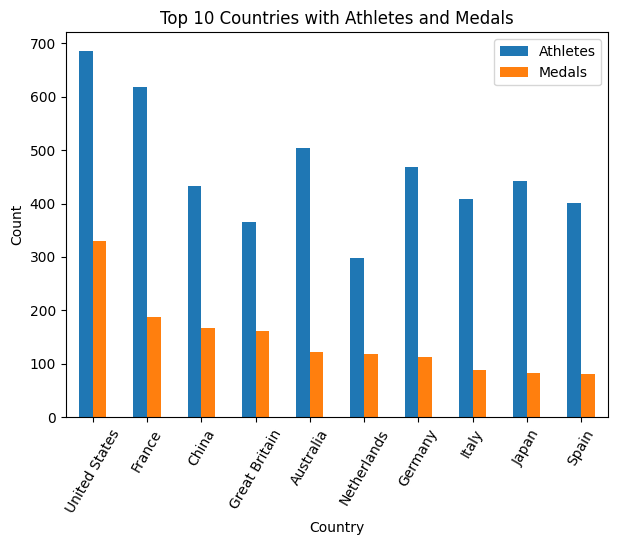

In [165]:
#Plot the count of athletes and medals awarded for the top 10 countries won medals using a barchart.
#Then set the name of the legend to Athletes and Medals.
athlete_medals_plt = country_athletes_medals.plot(kind='bar',     
                    title='Top 10 Countries with Athletes and Medals', 
                       ylabel='Count', 
                       xlabel='Country', 
                       rot=60, figsize=(7,5))

athlete_medals_plt.legend(['Athletes', 'Medals'])

In [166]:
#Get the total number of participated athletes from each country.
athlete_counts = merged_df_athletes['country'].value_counts().sort_values(ascending=False)

#Print the result saved in the athlete_counts variable.
print(athlete_counts)

country
United States    686
France           618
Australia        504
Germany          468
Japan            442
                ... 
Cook Islands       2
Belize             1
Nauru              1
Liechtenstein      1
Somalia            1
Name: count, Length: 206, dtype: int64


In [167]:
#Get the total number of all medals awarded by each country.
medal_counts = merged_df_athletes.groupby('country')['medal_type'].count().sort_values(ascending=False)

#Print the result saved in the medal_counts variable.
print(medal_counts)

country
United States    330
France           187
China            167
Great Britain    162
Australia        123
                ... 
Liberia            0
Lesotho            0
Lebanon            0
Latvia             0
Zimbabwe           0
Name: medal_type, Length: 206, dtype: int64


In [168]:
#Get the percentage of the total awarded medals by the total number 
#of all participated athletes by each country.
medal_percentage = (medal_counts / athlete_counts) * 100

#Print the result saved in the medal_percentage variable.
print(medal_percentage)

country
AIN                   18.750000
Afghanistan            0.000000
Albania               25.000000
Algeria                6.521739
American Samoa         0.000000
                        ...    
Virgin Islands, B      0.000000
Virgin Islands, US     0.000000
Yemen                  0.000000
Zambia                 3.225806
Zimbabwe               0.000000
Length: 206, dtype: float64


In [169]:
#Get the index of the top 10 countries awarded medals.
top_countries_index = medal_counts.sort_values(ascending=False).head(10).index

#Print the result saved in the top_countries_index variable.
print(top_countries_index)

Index(['United States', 'France', 'China', 'Great Britain', 'Australia',
       'Netherlands', 'Germany', 'Italy', 'Japan', 'Spain'],
      dtype='object', name='country')


In [170]:
#Get the percentage of the total awarded medals for the top 10 countries.
top_countries_medal_percentage = (medal_percentage.loc[top_countries_index]
                                  .sort_values(ascending=False))

#Print the result saved in the top_countries_medal_percentage variable.
print(top_countries_medal_percentage)

country
United States    48.104956
Great Britain    44.262295
Netherlands      39.597315
China            38.568129
France           30.258900
Australia        24.404762
Germany          24.145299
Italy            21.568627
Spain            20.199501
Japan            18.552036
dtype: float64


<Axes: title={'center': 'Percentage of the Awarded Medals by Top 10 Countries'}, xlabel='Country', ylabel='Awarded Medal Percentage (%)'>

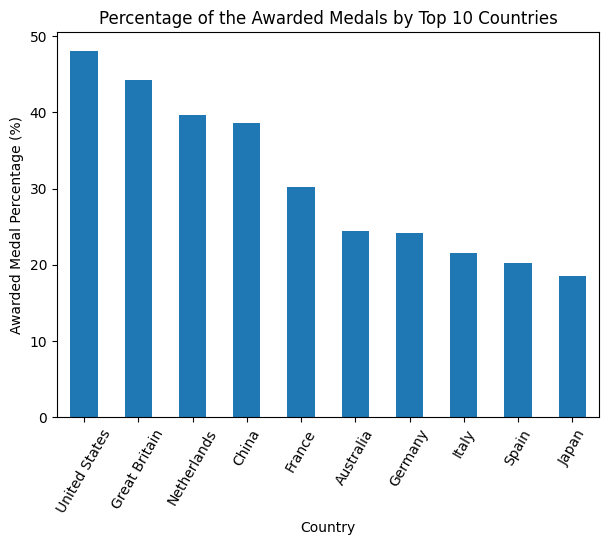

In [171]:
#Plot the percentage of the awarded medals for the top 10 countries using a barchart.
top_countries_medal_percentage.plot(kind='bar', 
                                    title='Percentage of the Awarded Medals by Top 10 Countries', 
                                    ylabel='Awarded Medal Percentage (%)', xlabel='Country', 
                                    rot=60, figsize=(7,5))

*Answer to research question:* In the previous calculations and after plotting the two bar charts, we can notice that there are top 10 countries with the highest number of the awarded medals in all types, these 10 countries sorted from the highest number of awarded medals as the following:
1. United States.
2. Great Britain.
3. Netherlands.
4. China.
5. France.
6. Australia.
7. Germany.
8. Italy.
9. Spain.
10. Japan.

As shown in the second bar chart, the percentage of the awarded medals by the total number for the United States country is around **%48**, while the percentage of the 10th country which is Japan is around **%18.5**.
This can lead us to the 10 leading countries dominates the olympic medal distributions overall.

In [172]:
#Get the top 10 countries won gold medals including
#the total number of each awarded medal types.
country_medal_type = (merged_df_athletes.groupby(['country', 'medal_type'])
                      .size().unstack(fill_value=0)
                      .sort_values(by='Gold', ascending=False).head(10))

#Print the result saved in the country_medal_type variable.
print(country_medal_type)

medal_type     Bronze  Gold  Silver
country                            
United States      95   134     101
China              40    71      56
Netherlands        26    67      25
France             39    53      95
Great Britain      80    40      42
Spain              36    39       6
Australia          45    33      45
Italy              28    31      29
Japan              24    27      31
New Zealand         7    26      18


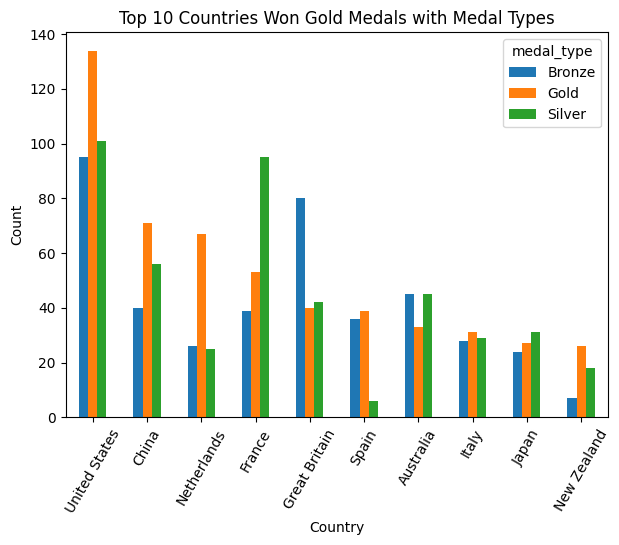

In [173]:
#Plot the count of medal types awarded for the top 10 countries won gold medals using a barchart.
country_medal_type_plt = country_medal_type.plot(kind='bar',     
                    title='Top 10 Countries Won Gold Medals with Medal Types', 
                       ylabel='Count', 
                       xlabel='Country', 
                       rot=60, figsize=(7,5))


*Answer to research question:* In order to focus on the total number of the awarded Gold medals, I calculated the number of the awarded medal types for each country, and ordered them by the total number of the awarded Gold medal by each country, and ploted the bar chart to visualize the distribution of medal types by each country. From this chart, we can notice that the United States still in the lead with **134** gold medals, while China came forward and occupied the second place with **71** instead of Greate Britain which won **40** Gold medals. On the other hand, we can't see Germany in the top 10 countries awarded Gold medals, while New Zealand joind the list in the 10th place with **26** Gold medals awarded.

In [174]:
#Get the top 10 countries won gold medals on specific disciplines including
#the total number of each awarded medal types in each disciplines.
country_discipline_medal = (merged_df_athletes.groupby(['country', 'discipline', 'medal_type'])
                           .size().unstack(fill_value=0)
                           .sort_values(by=['Gold'], ascending=False).head(10))

#Print the result saved in the country_discipline_medal variable.
print(country_discipline_medal)

medal_type                Bronze  Gold  Silver
country       discipline                      
Netherlands   Hockey           0    35       0
United States Athletics        9    33      16
              Swimming         7    27      36
              Basketball       0    24       0
Spain         Football         0    22       0
United States Football         0    20       0
Australia     Swimming        15    17      19
Denmark       Handball        15    16       0
Great Britain Rowing          15    15       6
France        Judo             6    15       2


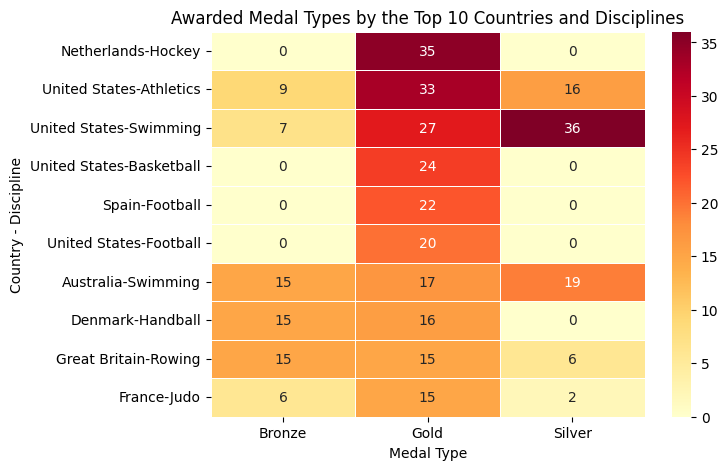

In [175]:
#Plot the count of medal types awarded in each discipline for the top 10 countries 
#won gold medals using a heatmap.

plt.figure(figsize=(7, 5))
sn.heatmap(
    country_discipline_medal, 
    annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5
)
plt.xlabel("Medal Type") 
plt.ylabel("Country - Discipline")  
plt.title("Awarded Medal Types by the Top 10 Countries and Disciplines")

plt.show()

*Answer to research question:* To get deep in the analysis and to answer our research question, I calculated the total number of each medal type and grouped them by the country and the discipline, then ordered them by the highest number of the awarded Gold medals, to get the highest number of the awarded gold medals in the top 10 countries and disciplines.

After reviewing the previous calculations and the plotted heatmap, we can notice that Netherlands country won the highest number of the awarded Gold medals in a single sport (discipline), which is *Hockey* with **35** Gold medals, followed by the United States country, which occupied the second, third and fourth places with the highest number of the awarded Gold medals in *Athletics*, *Swimming*, and *Basketball*, with **33**, **27**, and **24** Gold medals, and competes with Spain in *Football* to win **20** Gold medals, while Spain won **22** in the same sport.

From what mentioned previously, we can see that some countries like Netherlands, are good in a specific sport like *Hockey*, and they focused on their participation in this sport which lead to win the highest number of Gold medals in it. On the other hand, Some countries, like United States, have a higher number of participated athletes, and they participate in multiple disciplines, but also they dominates in winning the highest number of Gold medals in specific sports such as *Athletics*, *Swimming*, *Basketball* and *Football*. Which encourage these nations to focus on these kind of sports in their countries and provide a higher interest to them.

### **5.2:** Reflection

I would recommend to include a historical trends for olympic sports in previous years, such as the dataset provided by rgriffin user in **Kaggle** "120 years of Olympic history: athletes and results", which includes all the games from Athens 1896 to Rio 2016, which may assist in tracking how medal distribution evolves over time, and investigate how outliers (such as Jamaica in sprinting and Georgia in wrestling) dominate specific sports.

Also, may include the age in the analysis through calculating the age of each athlete from the provided birth date, and find the correlation between the age and the number of awarded medals in each  discipline.

In [176]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Data_Wrangling_Project_Starter.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 769684 bytes to Data_Wrangling_Project_Starter.html
